## Features(Columns) Information
1.  APP : Name of the App
2.  Category : Category under which the App falls
3.  Rating : App rating on google play
4.  Reviews : Number reviews of The App
5.  Install : Number of installs of the App
6.  Type : App is free or paid ?
7.  price : price of the App if it's Free = 0
8.  Content Rating : Appropiate Target Audience of the App
9.  Genres : Genre under which the App falls
10. size : size of the App
11. Last Updated : Date when the app was last updated
12. Current Version : Current Version of the App
13. Android Ver : Min android version required


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('googleplaystore.csv')

In [4]:
df = dataset.copy()
df.shape

(10841, 13)

### Clean Size Column

In [6]:
# We have one datapoint in Size column with value of 1,000+ and We remove this from Dataset
df = df[~df['Size'].str.contains('\+')]


<>:2: SyntaxWarning: invalid escape sequence '\+'
<>:2: SyntaxWarning: invalid escape sequence '\+'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12188\323854776.py:2: SyntaxWarning: invalid escape sequence '\+'
  df = df[~df['Size'].str.contains('\+')]


In [7]:
# 1 item was removed
df.shape

(10840, 13)

In [8]:
# Convert M ,K Size into Decimal 
df["Size"] = [
    int(float(s[:-1]) * 1e6) if s.endswith("M") else 
    int(float(s[:-1]) * 1e3) if s.endswith("k") else
    float(np.nan) 
    for s in df["Size"]
]

### Clean Installs Column

In [10]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [11]:
# for item in df["Installs"]:
#     for char in [",", "+"]:
#         df["Installs"].str.replace(char, "")

In [12]:
df["Installs"] = df["Installs"].str.replace("+", "")
df["Installs"] = df["Installs"].str.replace(",", "")
df["Installs"] = df["Installs"].astype(float)

### Clean Last Updated

In [14]:
df["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [15]:
# Convet January-7-2018 into Day = 7 , MOnth = 1 , Year = 2018 and then remove Last Updated Coloumn
df["Last Updated"] = pd.to_datetime(df["Last Updated"])
df["Day"] = df["Last Updated"].dt.day.astype(int)
df["Month"] = df["Last Updated"].dt.month.astype(int)
df["Year"] = df["Last Updated"].dt.year.astype(int)

In [16]:
df.drop("Last Updated", axis=1, inplace=True)

In [17]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
Day                 int32
Month               int32
Year                int32
dtype: object

### Clean Reviews

In [19]:
df["Reviews"]= df["Reviews"].astype(int)

In [20]:
df["Price"] = df["Price"].str.replace("$", "")
df["Price"] = df["Price"].astype(float)

In [21]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [22]:
df.to_csv("clean_dataset.csv")

## EDA

In [24]:
df[df.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,0.0,Everyone,Business,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,0.0,Everyone,Business,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0.0,Everyone,Business,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000000.0,10000000.0,Free,0.0,Everyone,Business,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,0.0,Everyone,Business,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1400000.0,100000.0,Free,0.0,Mature 17+,Dating,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000000.0,1000000.0,Free,0.0,Everyone,Communication,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000000.0,50000.0,Free,0.0,Everyone,Medical,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000000.0,1000000.0,Free,0.0,Everyone,Shopping,3.9,4.4 and up,30,7,2018


### Observation
The dataset has duplicate records 

In [26]:
df.drop_duplicates(subset=["App"], keep="first", inplace=True)

In [27]:
df.shape

(9659, 15)

In [28]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [29]:
print("We have {} numerical features such as: {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features such as: {}".format(len(categorical_features), categorical_features))

We have 8 numerical features such as: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
We have 7 categorical features such as: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [30]:
# count of data on categorical features
for col in categorical_features:
    print("------- {} -------".format(col))
    print(df[col].value_counts(normalize=True)*100)
    print("_"*30)

------- App -------
App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
______________________________
------- Category -------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY     

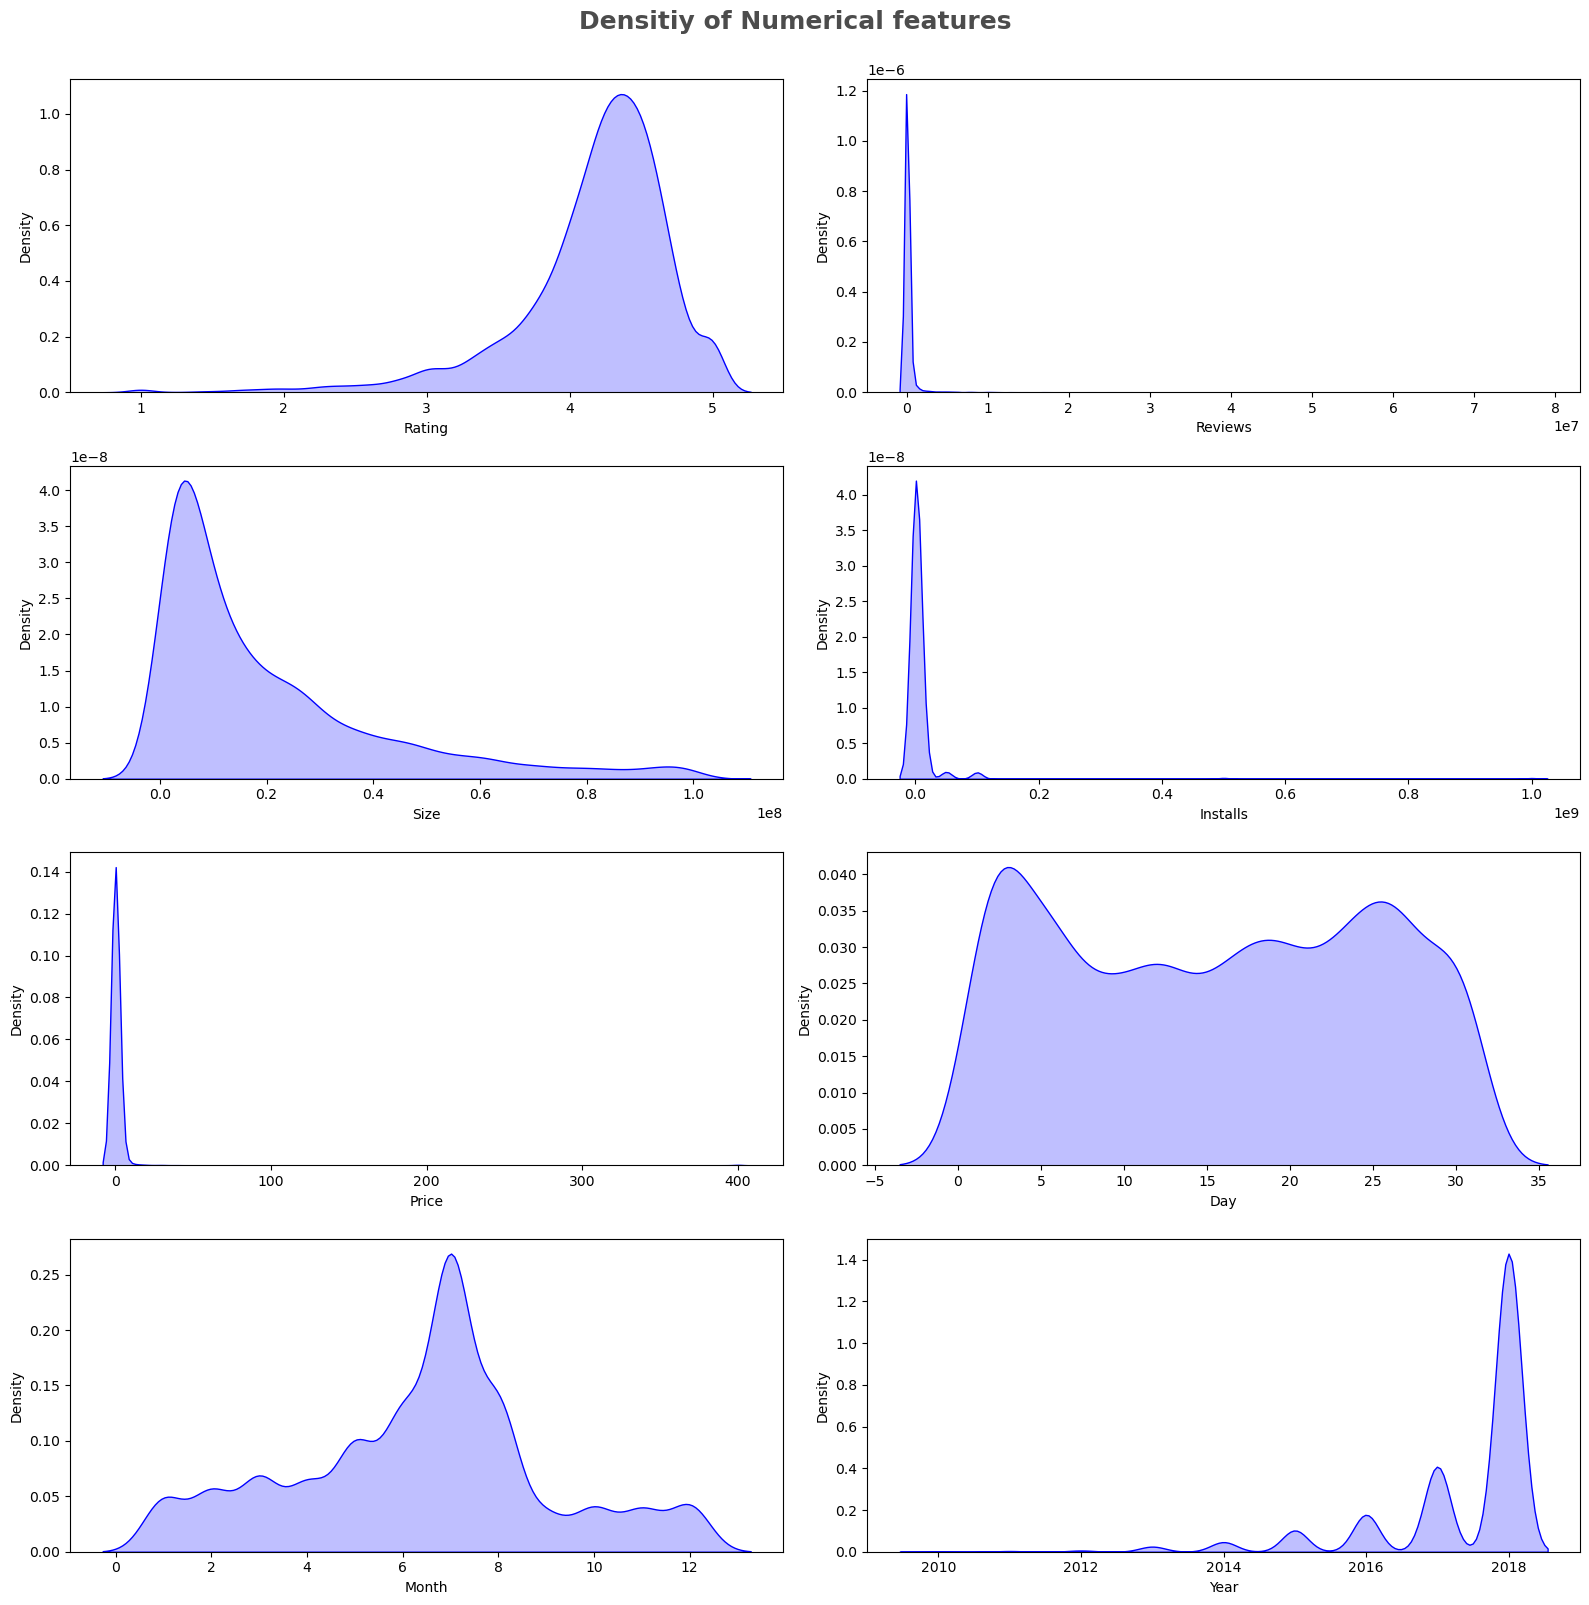

In [31]:
plt.figure(figsize=(16,16))
plt.suptitle("Densitiy of Numerical features", fontsize=18, fontweight="bold", alpha=.7, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numerical_features[i]], fill=True, color="Blue")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## Observation
1. Rating and Year are left skewed
2. Installs , Size , Reviews and Price are right skewed

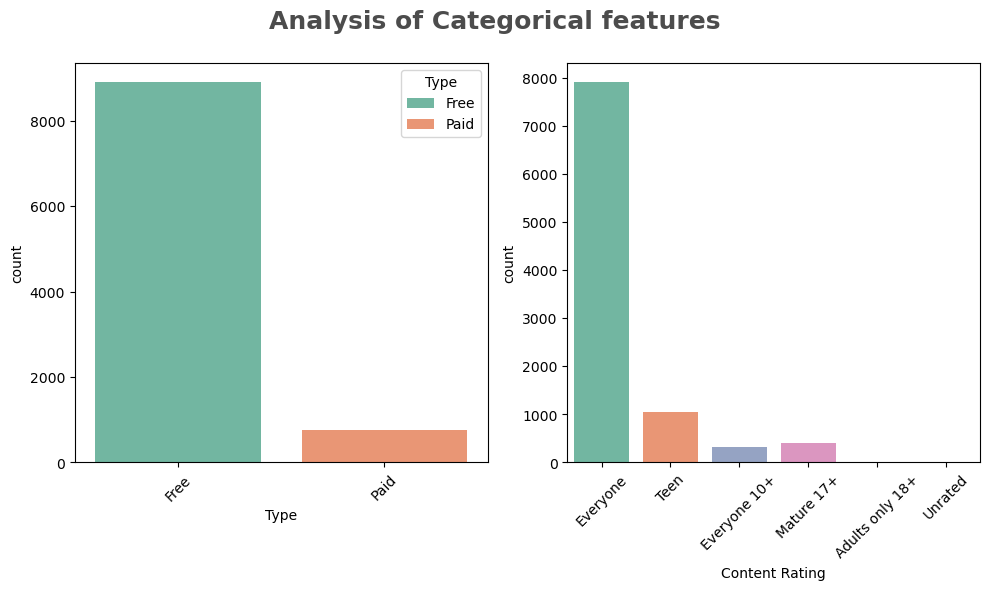

In [90]:
plt.figure(figsize=(10,10))
plt.suptitle("Analysis of Categorical features", fontsize=18, fontweight="bold", alpha=.7, y=1.)
categories = ['Type', 'Content Rating']
for i in range(0, len(categories)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categories[i]], palette="Set2", hue=df[categories[i]])
    plt.xlabel(categories[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Which App Category is popular ?

<Axes: ylabel='count'>

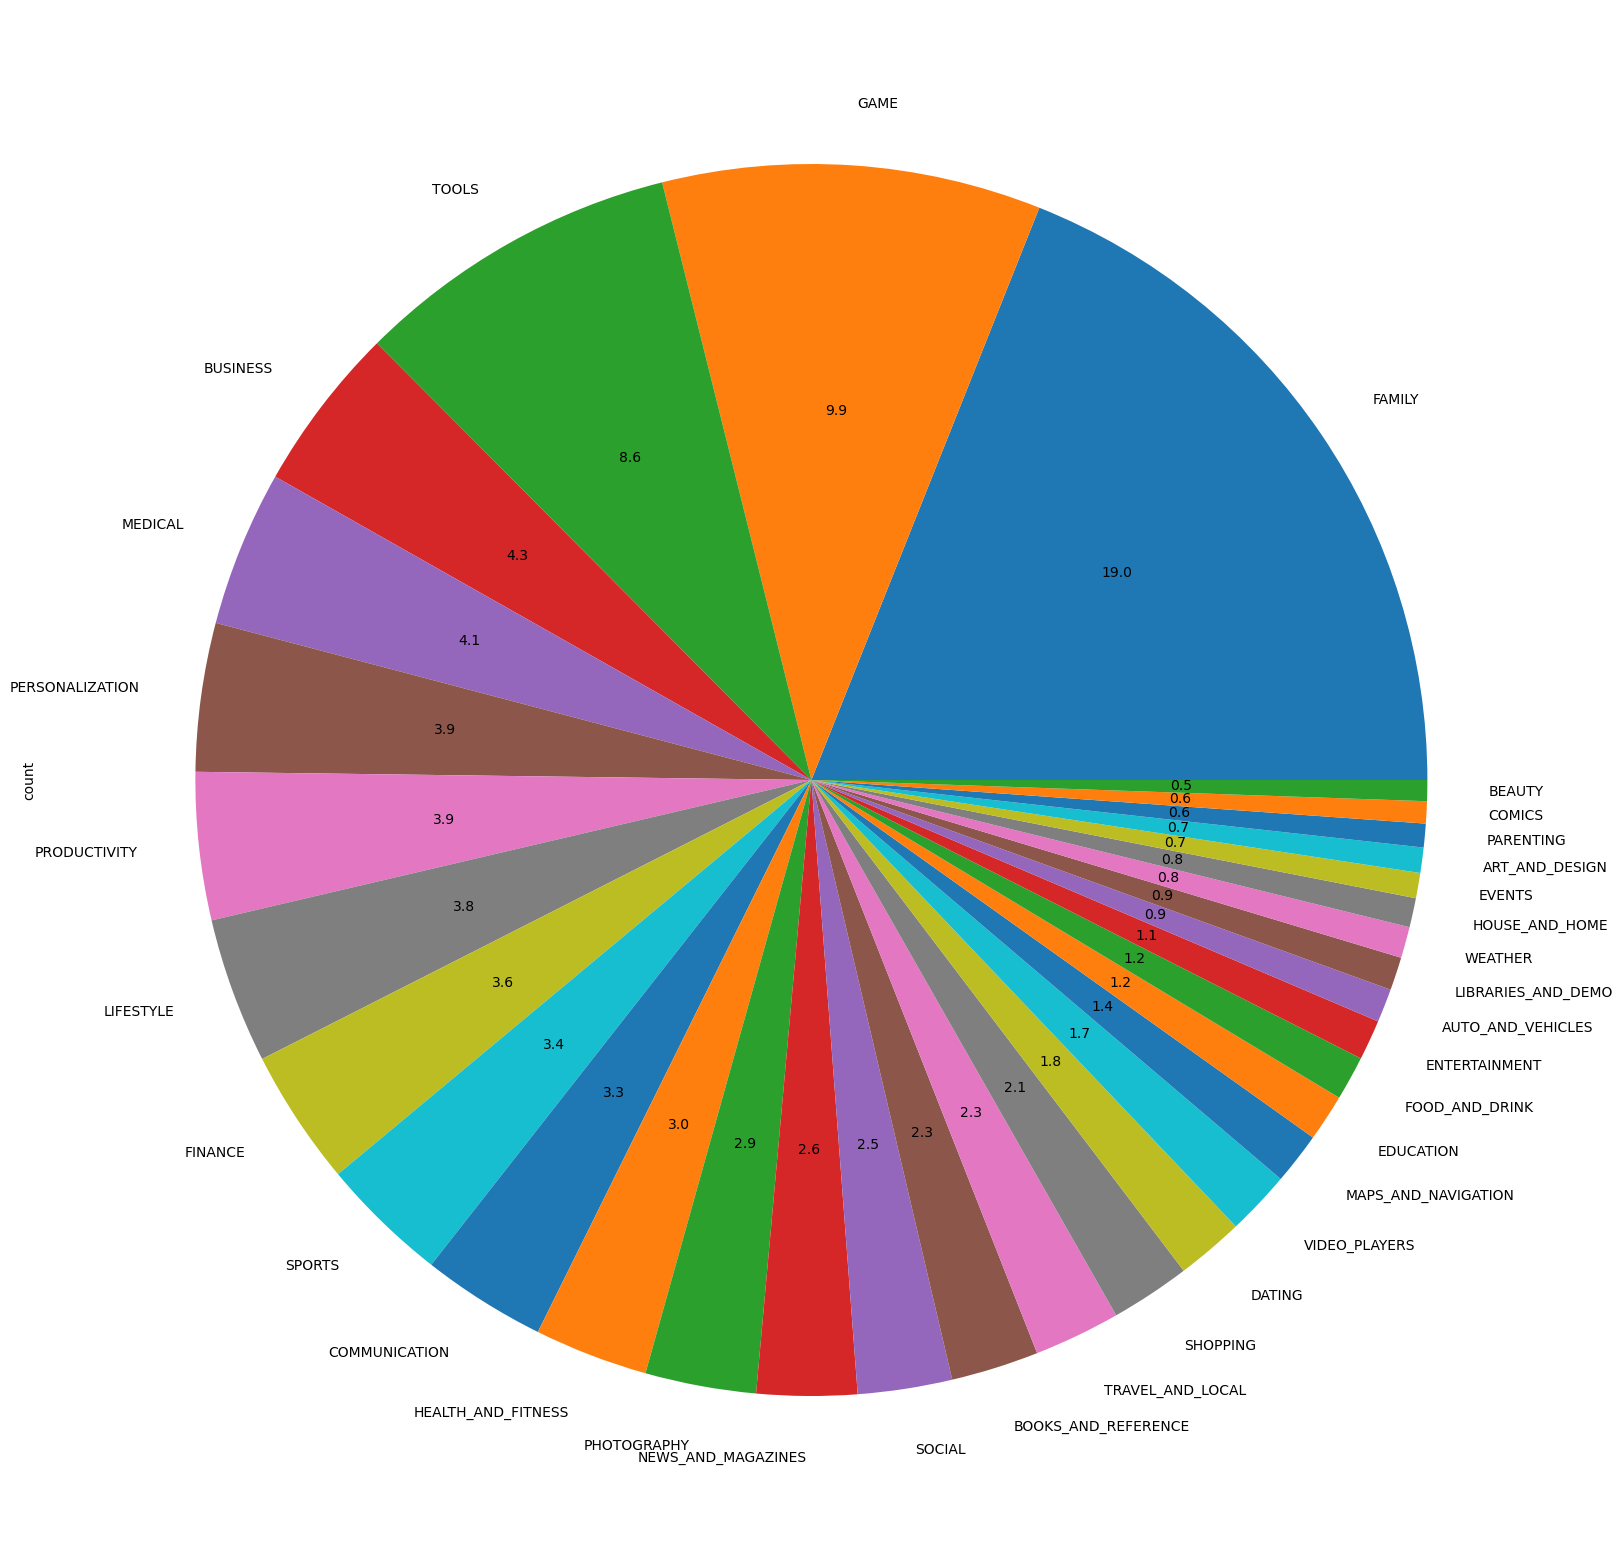

In [122]:
df["Category"].value_counts().plot.pie(y=df["Category"],figsize=(20,20), autopct='%1.1f')


## Top 10 App Categories

In [171]:
app_categories = pd.DataFrame(df["Category"].value_counts())


,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


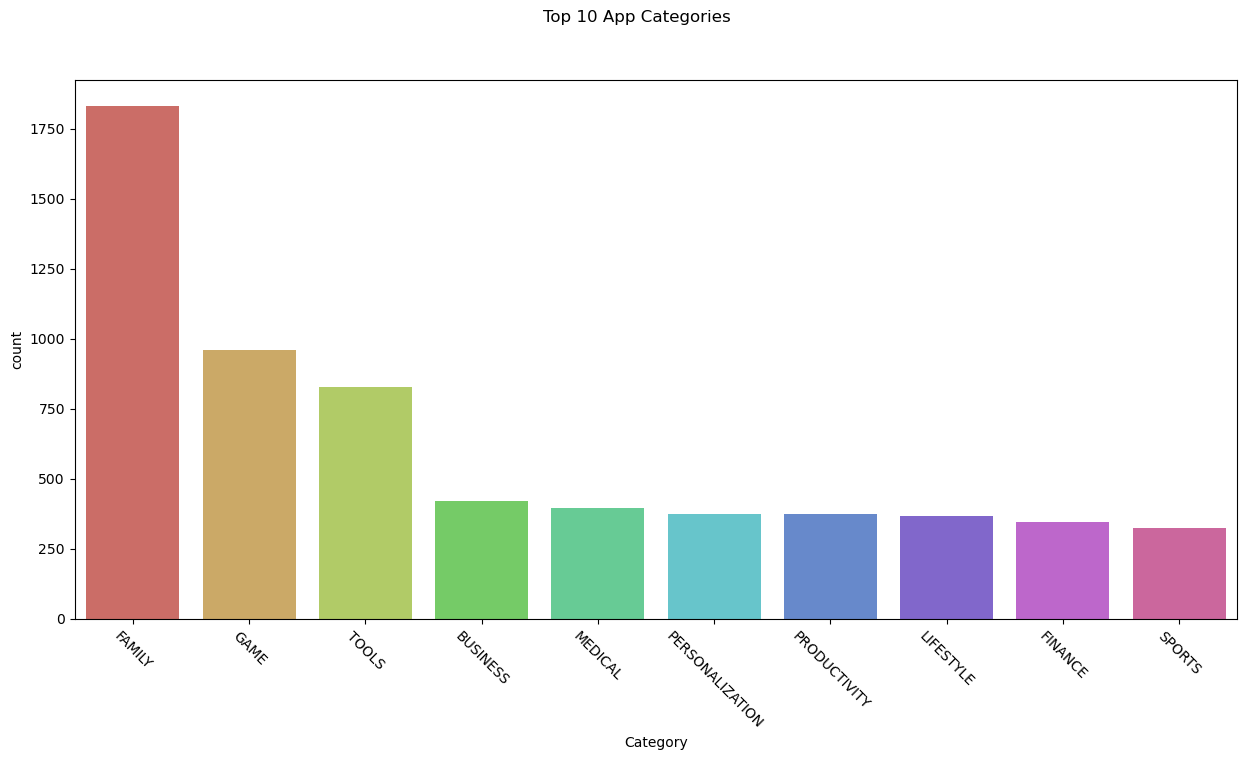

In [189]:
plt.figure(figsize=(15,7))
plt.suptitle("Top 10 App Categories")
sns.barplot(x=app_categories.index[:10], y="count", data=app_categories[:10],palette="hls", hue=app_categories.index[:10])
plt.xticks(rotation= -45)
plt.show()

## Which Category has largest number of installations??

In [270]:
all_cat_installs = df.groupby(["Category"])["Installs"].sum().sort_values(ascending=False).reset_index()
all_cat_installs["Installs"] = all_cat_installs["Installs"] / 1000000000 ## Convert to Billions
most_cat_installs = all_cat_installs.head(10)

In [272]:
most_cat_installs

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

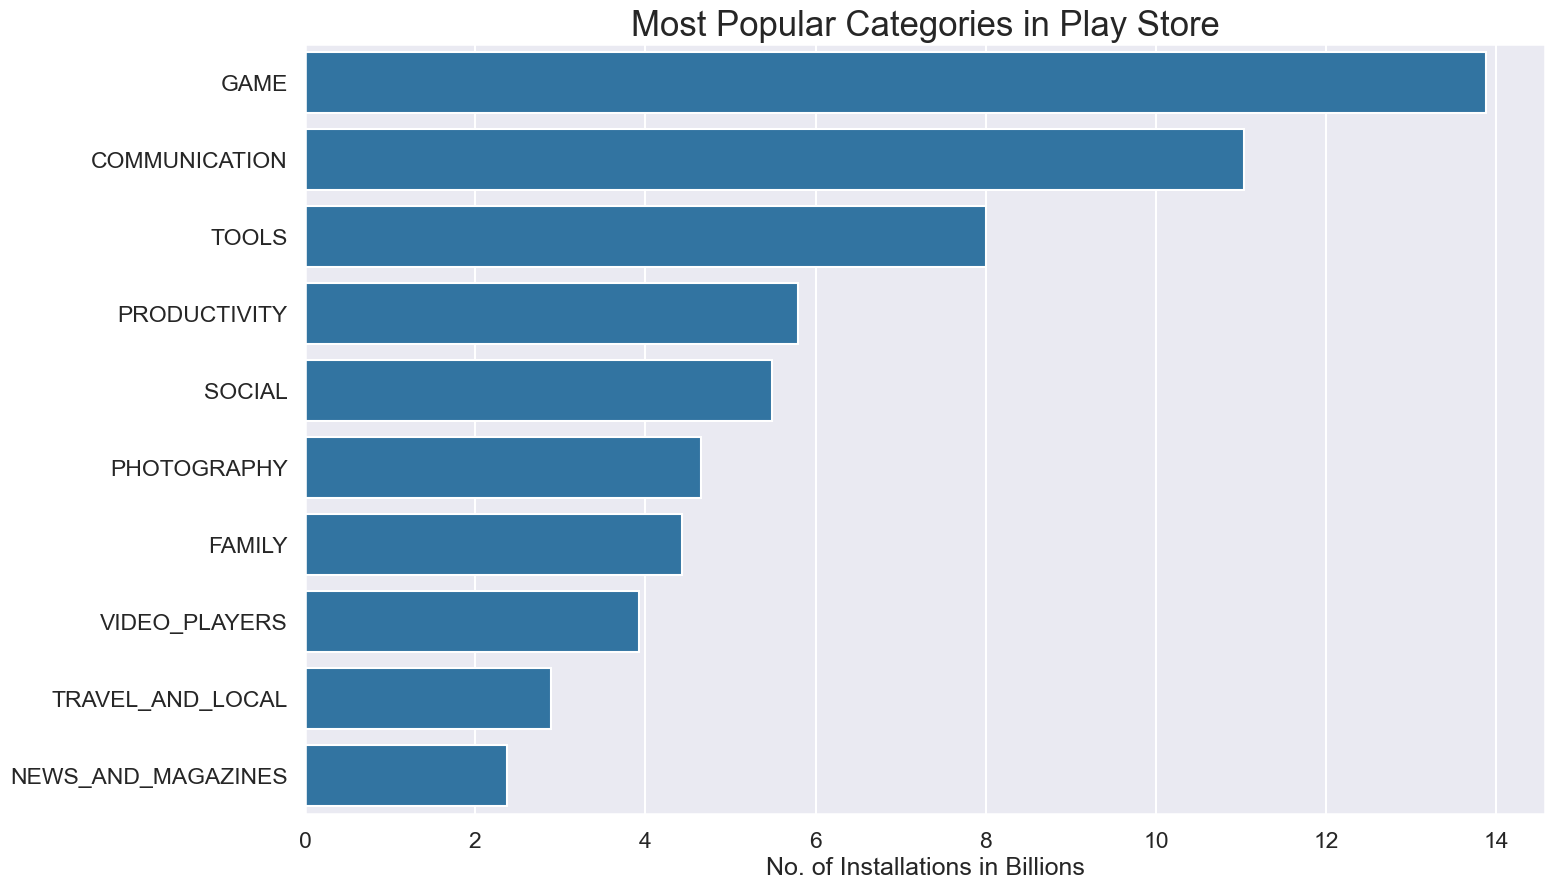

In [282]:
# Show whit bar plot
plt.figure(figsize = (16,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = most_cat_installs )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 25)